In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
iris_df['target'] = iris.target

In [6]:
iris_df['classname'] = [iris.target_names[x] for x in iris_df['target']]

In [7]:
iris_df.columns = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'target', 'classname']

In [8]:
iris_df

,sepal_l,sepal_w,petal_l,petal_w,target,classname
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


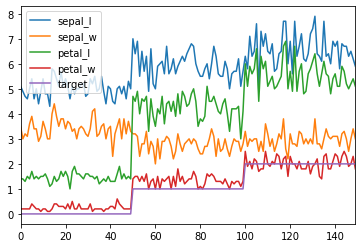

In [9]:
%matplotlib inline  

import matplotlib.pyplot as plt
iris_df.plot()

plt.show()

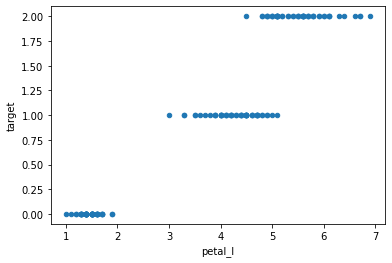

In [10]:
iris_df.plot(kind='scatter', x='petal_l', y='target')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1244c4a90>,
      dtype=object)

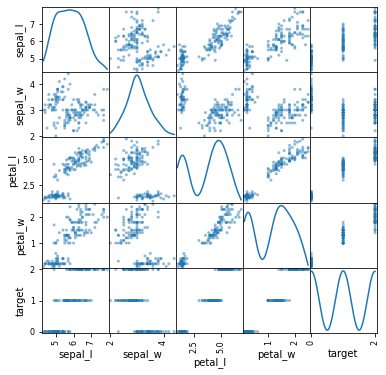

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df, alpha=0.5, figsize=(6, 6), diagonal='kde')

In [12]:
iris_df.corr()

,sepal_l,sepal_w,petal_l,petal_w,target
sepal_l,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_w,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_l,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_w,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [13]:
iris_df_tree = iris_df.copy()

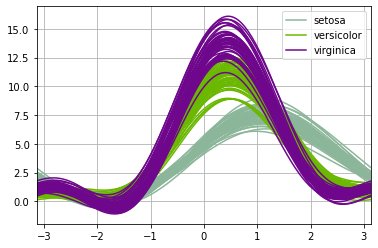

In [14]:
from pandas.plotting import andrews_curves

andrews_curves(iris_df, 'classname')

plt.show()

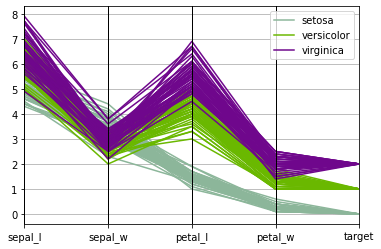

In [15]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(iris_df, 'classname')

plt.show()


In [16]:
from sklearn.model_selection import train_test_split

iris_df_tree = iris_df.copy()
X_train, X_test, y_train, y_test = train_test_split(iris_df_tree.ix[:,:-2], iris_df_tree.target, test_size=0.3)

In [17]:
from sklearn import tree


my_tree = tree.DecisionTreeClassifier()
my_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
train_predictions = pd.DataFrame(zip(my_tree.predict(X_train), y_train), columns=['predicted', 'real'])
train_predictions.groupby(['predicted', 'real']).apply(lambda x: len(x))
#train_predictions

predicted  real
0          0       37
1          1       35
2          2       33
dtype: int64

In [19]:
test_predictions = pd.DataFrame(zip(my_tree.predict(X_test), y_test), columns=['predicted', 'real'])
test_predictions.groupby(['predicted', 'real']).apply(lambda x: len(x))

predicted  real
0          0       13
1          1       11
2          1        4
           2       17
dtype: int64

In [20]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(my_tree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(my_tree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.91


In [21]:
pd.DataFrame(test_predictions.groupby(['predicted', 'real']).size())

0
predicted real    
0         0     13
1         1     11
2         1      4
          2     17

In [22]:
from sklearn.tree import export_graphviz
with open('my_tree.dot', 'w') as dotf:
    export_graphviz(
        my_tree,
        dotf,
        feature_names=iris.feature_names)
# http://sandbox.kidstrythisathome.com/erdos/

In [23]:
from sklearn.metrics import confusion_matrix
tree_predicted = my_tree.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[13  0  0]
 [ 0 11  4]
 [ 0  0 17]]


In [24]:
import seaborn as sns
from sklearn.metrics import accuracy_score
df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('Tree Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                       tree_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_predicted))

In [ ]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, tree_predicted, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, tree_predicted, average = 'macro')))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
my_sgd = KNeighborsClassifier()

my_sgd.fit(X_train, y_train)


In [ ]:
train_predictions = pd.DataFrame(zip(my_sgd.predict(X_train), y_train), columns=['predicted', 'real'])
train_predictions.groupby(['predicted', 'real']).apply(lambda x: len(x))

In [ ]:
print('Accuracy of KNeighbors classifier on training set: {:.2f}'
     .format(my_sgd.score(X_train, y_train)))
print('Accuracy of KNeighbors classifier on test set: {:.2f}'
     .format(my_sgd.score(X_test, y_test)))

In [ ]:
from sklearn.linear_model import SGDClassifier
my_sgd = SGDClassifier()

my_sgd.fit(X_train, y_train)
print('Accuracy of SGD classifier on training set: {:.2f}'
     .format(my_sgd.score(X_train, y_train)))
print('Accuracy of SGD classifier on test set: {:.2f}'
     .format(my_sgd.score(X_test, y_test)))

In [ ]:
from sklearn.linear_model import RidgeClassifier
my_sgd = RidgeClassifier()
my_sgd.fit(X_train, y_train)
print('Accuracy of Ridge classifier on training set: {:.2f}'
     .format(my_sgd.score(X_train, y_train)))
print('Accuracy of Ridge classifier on test set: {:.2f}'
     .format(my_sgd.score(X_test, y_test)))

In [ ]:
from  sklearn.ensemble import GradientBoostingClassifier
my_sgd = GradientBoostingClassifier()
my_sgd.fit(X_train, y_train)
print('Accuracy of GradientBoostingClassifier on training set: {:.2f}'
     .format(my_sgd.score(X_train, y_train)))
print('Accuracy of GradientBoostingClassifier on test set: {:.2f}'
     .format(my_sgd.score(X_test, y_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
my_sgd = RandomForestClassifier()
my_sgd.fit(X_train, y_train)
print('Accuracy of RandomForestClassifier on training set: {:.2f}'
     .format(my_sgd.score(X_train, y_train)))
print('Accuracy of RandomForestClassifier on test set: {:.2f}'
     .format(my_sgd.score(X_test, y_test)))